In [11]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

zsh:1: command not found: wget


In [1]:
with open('/Users/niharpatel/Desktop/Andrej_karpathy/archive/wikitext-2-raw/wikitest.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [2]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1288556


In [3]:
print(text[:1000])

 
 = Robert Boulter = 
 
 Robert Boulter is an English film , television and theatre actor . He had a guest @-@ starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode " Teddy 's Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the Menier Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall . 
 In 2006 , Boulter starred alongside Whishaw in the play Citizenship written by Mark Ravenhill . He appeared on a 20

In [4]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^abcdefghijklmnopqrstuvwxyz£¥©°½ÁÆÉ×ßàáãäåæçèéêëíîñóôöúüćčěīłŌōŠūžǐǔǜəɛɪʊˈː̍͘ΠΩέαβδειλμνοπςστυωόПвдикнאבילרשתاتدسكلوڠगनरलषुेो्ảẩ‑–—’“”†‡…⁄₩₱→−♯のアイクグジダッドナブラル中为伊傳八利前勢史型士大学宝开律成戦春智望杜東民王甫田甲秘聖艦處衛解詩贈邵都鉄集魯
259


In [5]:
#imports
import unicodedata
# function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text
# call function
remove_accented_chars(text)

' \n = Robert Boulter = \n \n Robert Boulter is an English film , television and theatre actor . He had a guest @-@ starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode " Teddy \'s Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the Menier Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall . \n In 2006 , Boulter starred alongside Whishaw in the play Citizenship written by Mark Ravenhill . He appeared o

In [6]:
# imports
import re
# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text[:1000])
 
# call function
remove_special_characters(text)

' \n  Robert Boulter  \n \n Robert Boulter is an English film , television and theatre actor . He had a guest  starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode " Teddy \'s Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the Menier Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall . \n In 2006 , Boulter starred alongside Whishaw in the play Citizenship written by Mark Ravenhill . He appeared on a 2

In [7]:
re.sub('\s+',' ',text)


' = Robert Boulter = Robert Boulter is an English film , television and theatre actor . He had a guest @-@ starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode " Teddy \'s Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the Menier Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall . In 2006 , Boulter starred alongside Whishaw in the play Citizenship written by Mark Ravenhill . He appeared on a 2006 epi

In [8]:
import torch

In [9]:
stoi = {ch:i for i,ch in enumerate(chars)}
itos = {i:ch for i,ch in enumerate(chars)}
encode = lambda s:[stoi[c] for c in s]
decode = lambda l:''.join([itos[i] for i in l])
print(encode("hii there"))
print(decode(encode("hii there")))

[70, 71, 71, 1, 82, 70, 67, 80, 67]
hii there


In [10]:
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000])

torch.Size([1288556]) torch.int64
tensor([ 1,  0,  1, 30,  1, 51, 77, 64, 67, 80, 82,  1, 35, 77, 83, 74, 82, 67,
        80,  1, 30,  1,  0,  1,  0,  1, 51, 77, 64, 67, 80, 82,  1, 35, 77, 83,
        74, 82, 67, 80,  1, 71, 81,  1, 63, 76,  1, 38, 76, 69, 74, 71, 81, 70,
         1, 68, 71, 74, 75,  1, 13,  1, 82, 67, 74, 67, 84, 71, 81, 71, 77, 76,
         1, 63, 76, 66,  1, 82, 70, 67, 63, 82, 80, 67,  1, 63, 65, 82, 77, 80,
         1, 15,  1, 41, 67,  1, 70, 63, 66,  1, 63,  1, 69, 83, 67, 81, 82,  1,
        33, 14, 33,  1, 81, 82, 63, 80, 80, 71, 76, 69,  1, 80, 77, 74, 67,  1,
        77, 76,  1, 82, 70, 67,  1, 82, 67, 74, 67, 84, 71, 81, 71, 77, 76,  1,
        81, 67, 80, 71, 67, 81,  1, 53, 70, 67,  1, 35, 71, 74, 74,  1, 71, 76,
         1, 19, 17, 17, 17,  1, 15,  1, 53, 70, 71, 81,  1, 85, 63, 81,  1, 68,
        77, 74, 74, 77, 85, 67, 66,  1, 64, 87,  1, 63,  1, 81, 82, 63, 80, 80,
        71, 76, 69,  1, 80, 77, 74, 67,  1, 71, 76,  1, 82, 70, 67,  1, 78, 74,
      

In [11]:
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

In [12]:
block_size = 8
train_data[:block_size+1]

tensor([ 1,  0,  1, 30,  1, 51, 77, 64, 67])

In [13]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([1]) the target: 0
when input is tensor([1, 0]) the target: 1
when input is tensor([1, 0, 1]) the target: 30
when input is tensor([ 1,  0,  1, 30]) the target: 1
when input is tensor([ 1,  0,  1, 30,  1]) the target: 51
when input is tensor([ 1,  0,  1, 30,  1, 51]) the target: 77
when input is tensor([ 1,  0,  1, 30,  1, 51, 77]) the target: 64
when input is tensor([ 1,  0,  1, 30,  1, 51, 77, 64]) the target: 67


In [14]:
torch.manual_seed(1337)
batch_size = 4
block_size = 8

In [15]:
def get_batch(split):
    data = train_data if split=='train' else val_data
    ix = torch.randint(len(data)-block_size,(batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x,y

In [16]:
xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

inputs:
torch.Size([4, 8])
tensor([[67,  1, 75, 71, 66, 66, 74, 67],
        [77, 80, 71, 65, 63, 74,  1, 30],
        [ 1, 63, 74, 71, 84, 67,  1, 32],
        [67,  1, 15,  1, 41, 67,  1, 64]])
targets:
torch.Size([4, 8])
tensor([[ 1, 75, 71, 66, 66, 74, 67,  1],
        [80, 71, 65, 63, 74,  1, 30,  1],
        [63, 74, 71, 84, 67,  1, 32,  1],
        [ 1, 15,  1, 41, 67,  1, 64, 67]])
----


In [17]:
for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

when input is [67] the target: 1
when input is [67, 1] the target: 75
when input is [67, 1, 75] the target: 71
when input is [67, 1, 75, 71] the target: 66
when input is [67, 1, 75, 71, 66] the target: 66
when input is [67, 1, 75, 71, 66, 66] the target: 74
when input is [67, 1, 75, 71, 66, 66, 74] the target: 67
when input is [67, 1, 75, 71, 66, 66, 74, 67] the target: 1
when input is [77] the target: 80
when input is [77, 80] the target: 71
when input is [77, 80, 71] the target: 65
when input is [77, 80, 71, 65] the target: 63
when input is [77, 80, 71, 65, 63] the target: 74
when input is [77, 80, 71, 65, 63, 74] the target: 1
when input is [77, 80, 71, 65, 63, 74, 1] the target: 30
when input is [77, 80, 71, 65, 63, 74, 1, 30] the target: 1
when input is [1] the target: 63
when input is [1, 63] the target: 74
when input is [1, 63, 74] the target: 71
when input is [1, 63, 74, 71] the target: 84
when input is [1, 63, 74, 71, 84] the target: 67
when input is [1, 63, 74, 71, 84, 67] th

In [18]:
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)


In [19]:
class BigramLanguageModel(nn.Module):
    
    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
    
    def forward(self,idx,targets=None):
        logits = self.token_embedding_table(idx) # (B,T,C)
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss
    def generate(self, idx, max_new_tokens):

        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx
    

In [20]:
m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))

torch.Size([32, 259])
tensor(6.0665, grad_fn=<NllLossBackward0>)

π×īкブQלɪτسת解e都宝Á^ÁTí^?ž史/lジō̍नグẩ律̍ë为Ō†μŠष‑^前tZ(学ダイ甫ʊñ^#ç解王ڠr智t?,yكîאOυ−/pɪǐेк中ु*ảvتέfłグpS贈L戦7QL:Y–ǐδ


In [21]:
optimizer = torch.optim.AdamW(m.parameters(),lr=1e-3)

In [22]:
batch_size = 32
for steps in range(10000): # increase number of steps for good results... 
    
    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())


2.5363030433654785


In [23]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


 torare res ostersin m 1 , her e an Cakmalac Hoparble 
 處üJPả集†ωö's of ahalfonus on NYue 10sk d t Bly Bis atearonas 
 , ned . Ongof and rr pha way Lonce f . Ranthivin twe am fispe aperuly Gempangn . tindris EέкA ousourn 1675 wer , s s asteactena , facars LEיυεd ien stzzzナ王ν@. h the tespristh h alikm 
 ancereerunioed thashe her thin indr pile elour衛ftis avendes , therאẩ中ẩxëCor theaner ipioumert t c I almpuie " , ) Maue I )のרڠ前宝όיansutefr Ma前为民6 oock Brane beecas cky = cts )Mamyiss hechor hesteeni


# Mathematical trick of self attention


In [24]:
torch.manual_seed(1337)
B,T,C = 4,8,2
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [25]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [26]:
# We want x[b,t] = mean_{i<=t} x[b,i]
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0)


In [27]:
# version 2: using matrix multiply for a weighted aggregation
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
xbow2 = wei @ x # (B, T, T) @ (B, T, C) ----> (B, T, C)
torch.allclose(xbow, xbow2)

True

In [28]:
# version 3: use Softmax
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x
torch.allclose(xbow, xbow3)


True

In [29]:
# version 4: self-attention!
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)

tril = torch.tril(torch.ones(T, T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v
#out = wei @ x

out.shape

torch.Size([4, 8, 16])

Notes:
- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

In [30]:
class LayerNorm1d: # (used to be BatchNorm1d)
  
  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
  
  def __call__(self, x):
    # calculate the forward pass
    xmean = x.mean(1, keepdim=True) # batch mean
    xvar = x.var(1, keepdim=True) # batch variance
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    return self.out
  def parameters(self):
    return [self.gamma, self.beta]

torch.manual_seed(1337)
module = LayerNorm1d(100)
x = torch.randn(32, 100) # batch size 32 of 100-dimensional vectors
x = module(x)
x.shape

torch.Size([32, 100])

In [31]:
x[:,0].mean(), x[:,0].std() # mean,std of one feature across all batch inputs

(tensor(0.1469), tensor(0.8803))

In [1]:
import h5py

In [2]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import psutil
import matplotlib.pyplot as plt

cpu_percentages1 = []
memory_percentages1 = []

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('/Users/niharpatel/Desktop/Andrej_karpathy/archive/wikitext-2-raw/wikitest.txt', 'r', encoding='utf-8') as f:
    text = f.read()

chars = sorted(list(set(text)))
vocab_size = len(chars)
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)
losses_train = []
losses_val = []
perplexities_train = []
perplexities_val = []
accuracies_train = []
accuracies_val = []


for iter in range(max_iters):

    # Record the CPU and memory usage
    cpu_percentages1.append(psutil.cpu_percent())
    memory_percentages1.append(psutil.virtual_memory().percent)

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        losses_train.append(losses['train'])
        losses_val.append(losses['val'])

 
    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


zsh:1: command not found: wget
0.234755 M parameters
step 0: train loss 5.7946, val loss 5.7871
step 100: train loss 2.7281, val loss 2.7278
step 200: train loss 2.5838, val loss 2.5704
step 300: train loss 2.4862, val loss 2.4846
step 400: train loss 2.4287, val loss 2.4235
step 500: train loss 2.3764, val loss 2.3651
step 600: train loss 2.3222, val loss 2.3166
step 700: train loss 2.2854, val loss 2.2732
step 800: train loss 2.2420, val loss 2.2411
step 900: train loss 2.2044, val loss 2.1865
step 1000: train loss 2.1714, val loss 2.1514
step 1100: train loss 2.1408, val loss 2.1378
step 1200: train loss 2.1119, val loss 2.1102
step 1300: train loss 2.1035, val loss 2.1125
step 1400: train loss 2.0829, val loss 2.0829
step 1500: train loss 2.0421, val loss 2.0643
step 1600: train loss 2.0313, val loss 2.0484
step 1700: train loss 2.0150, val loss 2.0356
step 1800: train loss 1.9889, val loss 2.0255
step 1900: train loss 1.9773, val loss 1.9969
step 2000: train loss 1.9525, val loss 

In [3]:
torch.save(model.state_dict(), 'TRANSFORMERmodel.h5')

In [16]:
print("Losses Train")
print(losses_train)
print("\n")
print("validation Losses")
print(losses_val)

Losses Train
[tensor(5.7946), tensor(2.7281), tensor(2.5838), tensor(2.4862), tensor(2.4287), tensor(2.3764), tensor(2.3222), tensor(2.2854), tensor(2.2420), tensor(2.2044), tensor(2.1714), tensor(2.1408), tensor(2.1119), tensor(2.1035), tensor(2.0829), tensor(2.0421), tensor(2.0313), tensor(2.0150), tensor(1.9889), tensor(1.9773), tensor(1.9525), tensor(1.9342), tensor(1.9252), tensor(1.9245), tensor(1.8947), tensor(1.8850), tensor(1.8797), tensor(1.8710), tensor(1.8610), tensor(1.8427), tensor(1.8353), tensor(1.8219), tensor(1.8176), tensor(1.8041), tensor(1.7839), tensor(1.7768), tensor(1.7885), tensor(1.7705), tensor(1.7647), tensor(1.7574), tensor(1.7570), tensor(1.7422), tensor(1.7405), tensor(1.7383), tensor(1.7300), tensor(1.7080), tensor(1.7138), tensor(1.7123), tensor(1.7142), tensor(1.6879), tensor(1.7005)]


validation Losses
[tensor(5.7871), tensor(2.7278), tensor(2.5704), tensor(2.4846), tensor(2.4235), tensor(2.3651), tensor(2.3166), tensor(2.2732), tensor(2.2411), tenso

In [21]:
def calculate_accuracy(generated_text, ground_truth_text):
    # Compare the generated text with the ground truth text
    correct = 0
    total = 0
    for gen_char, gt_char in zip(generated_text, ground_truth_text):
        if gen_char == gt_char:
            correct += 1
        total += 1

    # Calculate accuracy as the ratio of correct predictions to total predictions
    accuracy = correct / total
    return accuracy


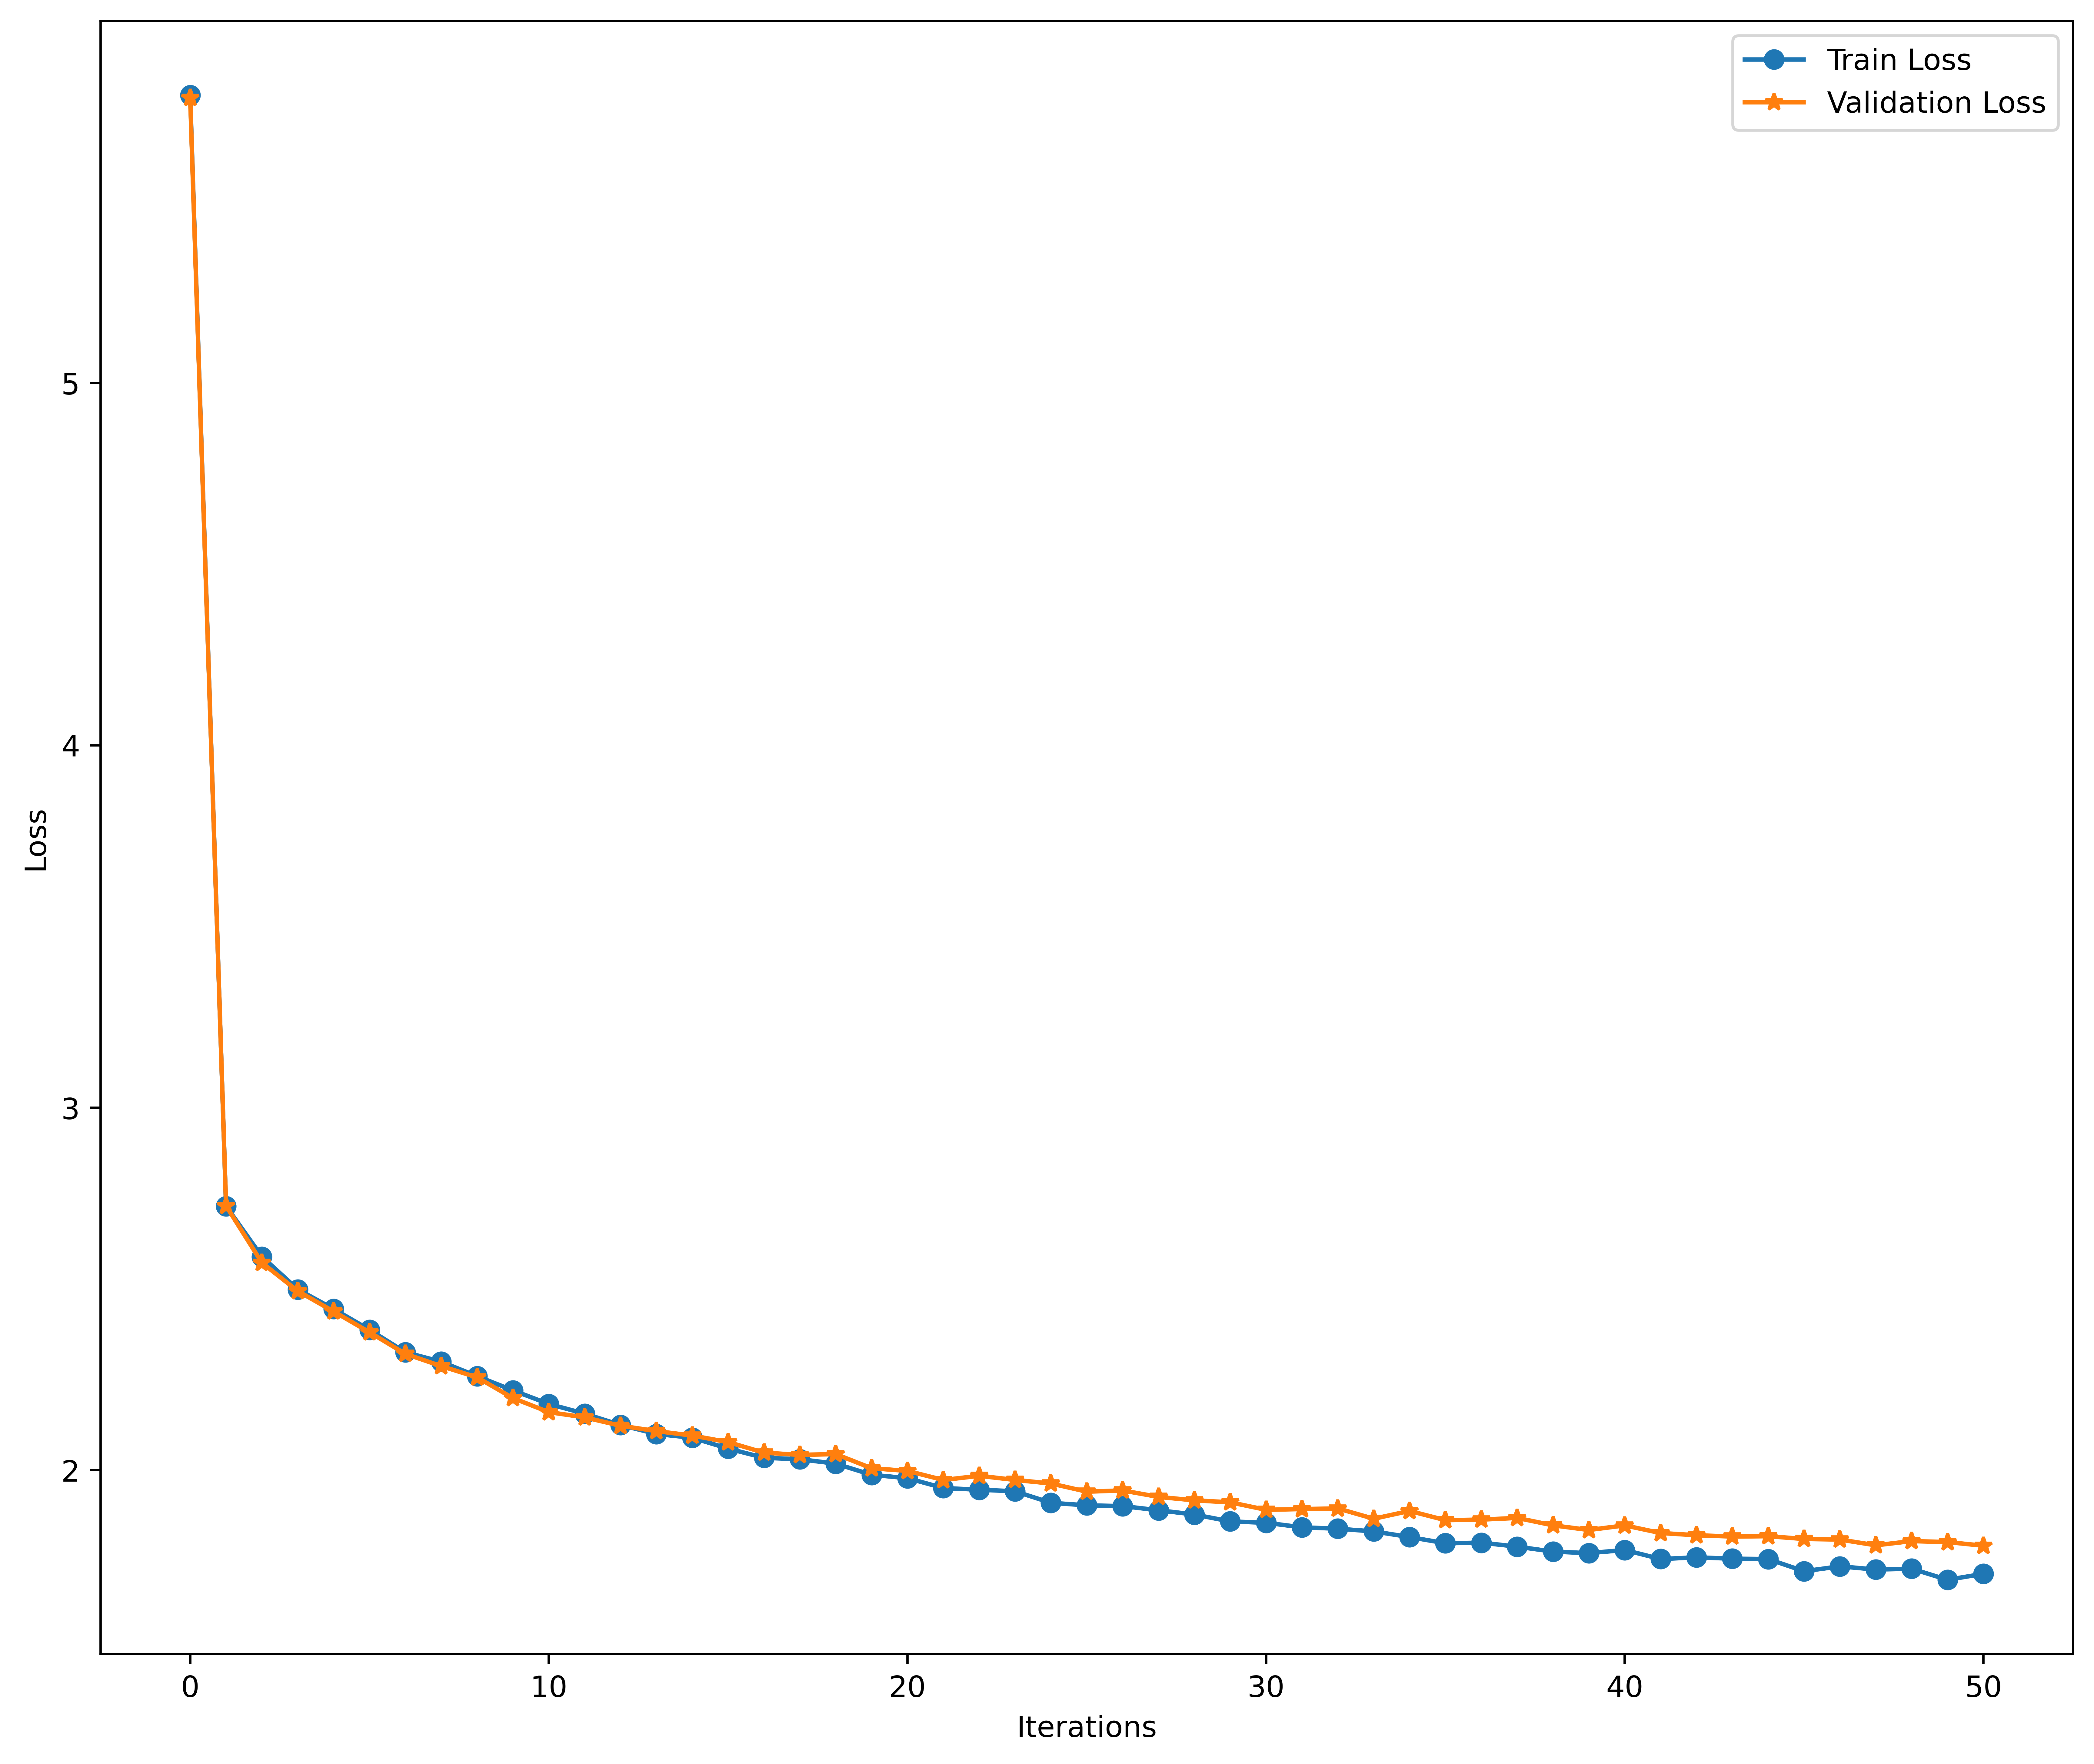

In [17]:
plt.figure(figsize=(12, 10), dpi=700)
plt.plot(losses_train, label='Train Loss', marker="o")
plt.plot(losses_val, label='Validation Loss', marker="*")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(losses_train 
losses_val 

In [2]:
import random

In [3]:
n_clients = 10
client_data = []

In [4]:
for _ in range(n_clients):
    n_data = len(train_data) // n_clients
    client_data.append(train_data[random.sample(range(len(train_data)), n_data)])

In [5]:
@torch.no_grad()
def estimate_loss1(model):
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out


In [6]:
def local_train(client_idx, model, n_local_iters):
    local_model = BigramLanguageModel().to(device)
    local_model.load_state_dict(model.state_dict())
    local_optimizer = torch.optim.AdamW(local_model.parameters(), lr=learning_rate)

    local_data = client_data[client_idx]

    for iter in range(n_local_iters):
        xb, yb = get_batch(local_data)  # Use the client's local data
        logits, loss = local_model(xb, yb)
        local_optimizer.zero_grad(set_to_none=True)
        loss.backward()
        local_optimizer.step()

    # Estimate local train and validation losses
    local_losses = estimate_loss1(model=local_model)
    print(f"Client {client_idx}: Local train loss {local_losses['train']:.4f}, Local val loss {local_losses['val']:.4f}")

    return local_model


In [7]:
n_global_iters = 20
n_local_iters = 100

In [8]:
global_model = BigramLanguageModel().to(device)


In [9]:
import psutil
import matplotlib.pyplot as plt
import torch

In [10]:
cpu_percentages = []
memory_percentages = []

In [11]:
local_losses_train = []
local_losses_val = []
global_losses_train = []
global_losses_val = []

In [12]:
for global_iter in range(n_global_iters):
    local_models = []
    
    # Train local models for all clients
    for client_idx in range(n_clients):
        local_model = local_train(client_idx, global_model, n_local_iters)
        local_models.append(local_model.state_dict())

        # Estimate local train and validation losses
        local_losses = estimate_loss1(model=local_model)
        local_losses_train.append(local_losses['train'])
        local_losses_val.append(local_losses['val'])

    # Average the updates from all clients
    global_state_dict = {}
    for key in local_models[0].keys():
        global_state_dict[key] = torch.mean(torch.stack([local_model[key].float() for local_model in local_models]), dim=0)

    global_model.load_state_dict(global_state_dict)

    # Estimate global train and validation losses
    global_losses = estimate_loss1(model=global_model)
    print(f"Global iter {global_iter}: Global train loss {global_losses['train']:.4f}, Global val loss {global_losses['val']:.4f}")

    # Append global losses to lists
    global_losses_train.append(global_losses['train'])
    global_losses_val.append(global_losses['val'])

    # Record the CPU and memory usage
    cpu_percentages.append(psutil.cpu_percent())
    memory_percentages.append(psutil.virtual_memory().percent)


Client 0: Local train loss 2.7453, Local val loss 2.7045
Client 1: Local train loss 2.7401, Local val loss 2.7099
Client 2: Local train loss 2.7399, Local val loss 2.7017
Client 3: Local train loss 2.7467, Local val loss 2.7051
Client 4: Local train loss 2.7452, Local val loss 2.7085
Client 5: Local train loss 2.7549, Local val loss 2.7051
Client 6: Local train loss 2.7449, Local val loss 2.7158
Client 7: Local train loss 2.7562, Local val loss 2.7047
Client 8: Local train loss 2.7408, Local val loss 2.7076
Client 9: Local train loss 2.7408, Local val loss 2.7069
Global iter 0: Global train loss 2.7358, Global val loss 2.6992
Client 0: Local train loss 2.5874, Local val loss 2.5185
Client 1: Local train loss 2.5931, Local val loss 2.5198
Client 2: Local train loss 2.5754, Local val loss 2.5099
Client 3: Local train loss 2.5956, Local val loss 2.5172
Client 4: Local train loss 2.5936, Local val loss 2.5189
Client 5: Local train loss 2.5944, Local val loss 2.5270
Client 6: Local train lo

Client 0: Local train loss 2.1953, Local val loss 1.9878
Client 1: Local train loss 2.2033, Local val loss 1.9788
Client 2: Local train loss 2.1914, Local val loss 1.9876
Client 3: Local train loss 2.1873, Local val loss 1.9703
Client 4: Local train loss 2.1931, Local val loss 1.9633
Client 5: Local train loss 2.2101, Local val loss 1.9711
Client 6: Local train loss 2.1927, Local val loss 1.9700
Client 7: Local train loss 2.2046, Local val loss 1.9910
Client 8: Local train loss 2.1968, Local val loss 1.9857
Client 9: Local train loss 2.1911, Local val loss 1.9814
Global iter 13: Global train loss 2.1507, Global val loss 1.9232
Client 0: Local train loss 2.1798, Local val loss 1.9524
Client 1: Local train loss 2.1795, Local val loss 1.9427
Client 2: Local train loss 2.1831, Local val loss 1.9503
Client 3: Local train loss 2.1809, Local val loss 1.9622
Client 4: Local train loss 2.1873, Local val loss 1.9440
Client 5: Local train loss 2.1927, Local val loss 1.9492
Client 6: Local train l

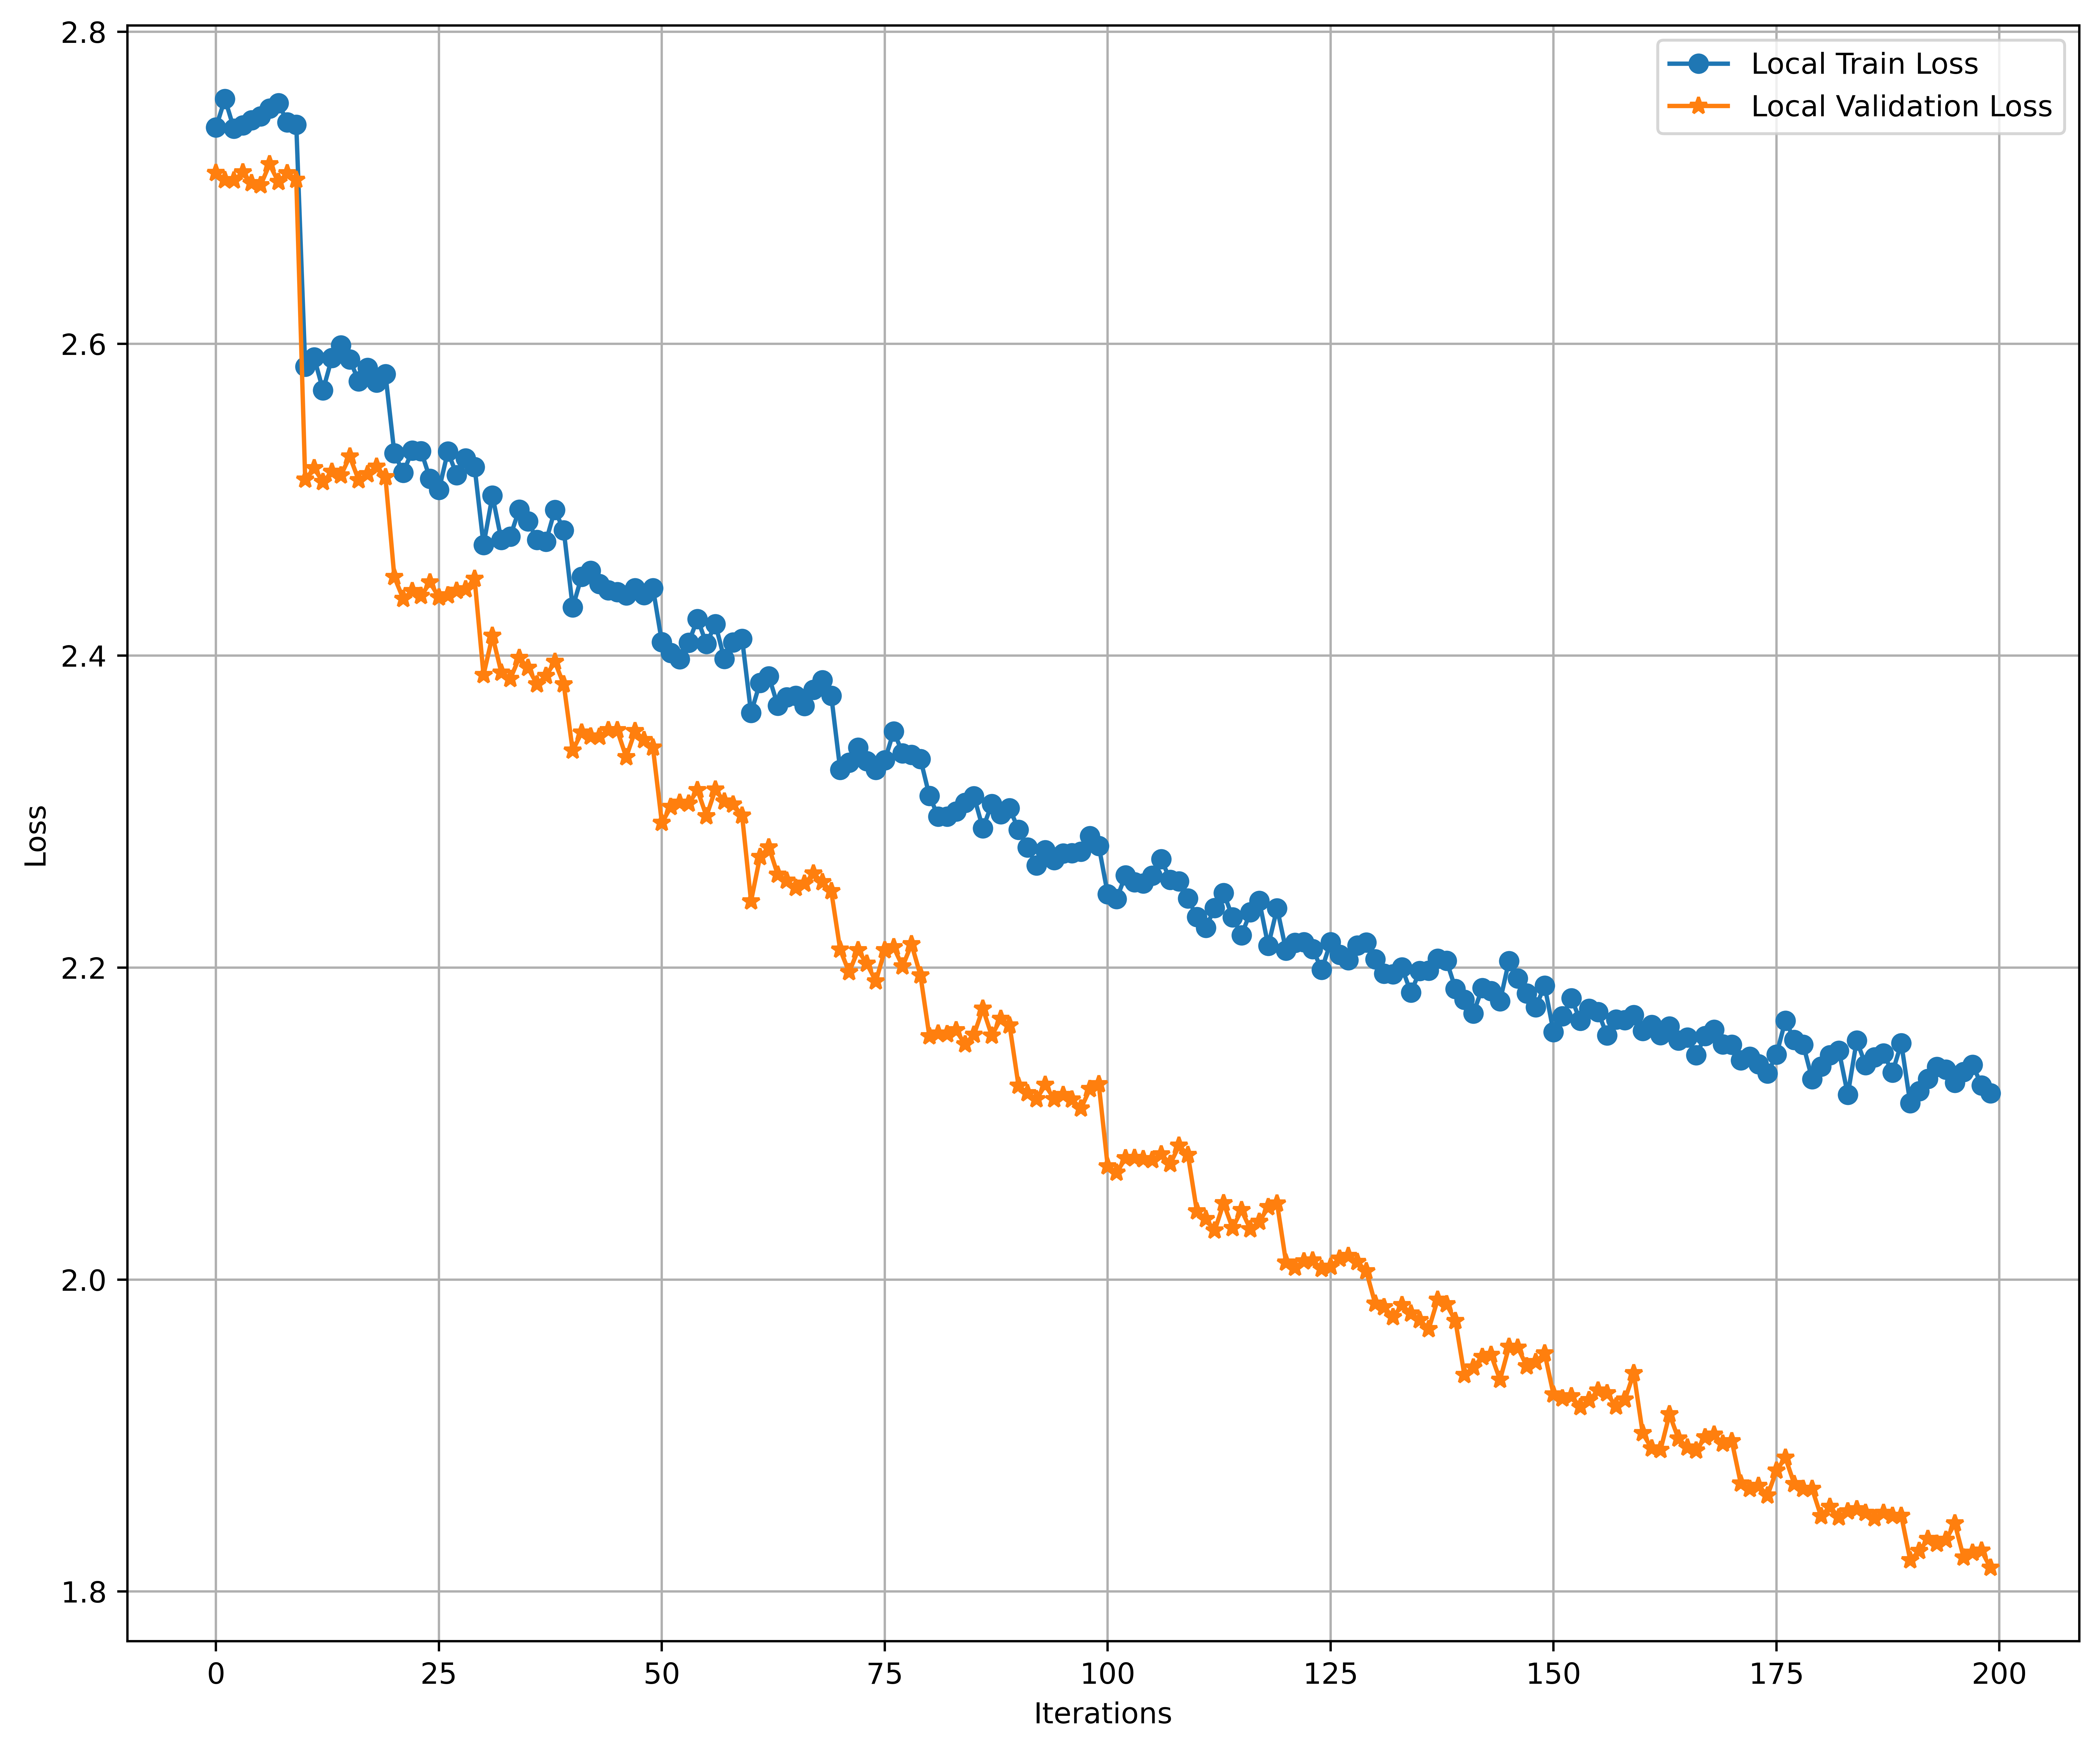

In [13]:
plt.figure(figsize=(12, 10),dpi=700)
plt.plot(local_losses_train, label='Local Train Loss',marker="o")
plt.plot(local_losses_val, label='Local Validation Loss',marker="*")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

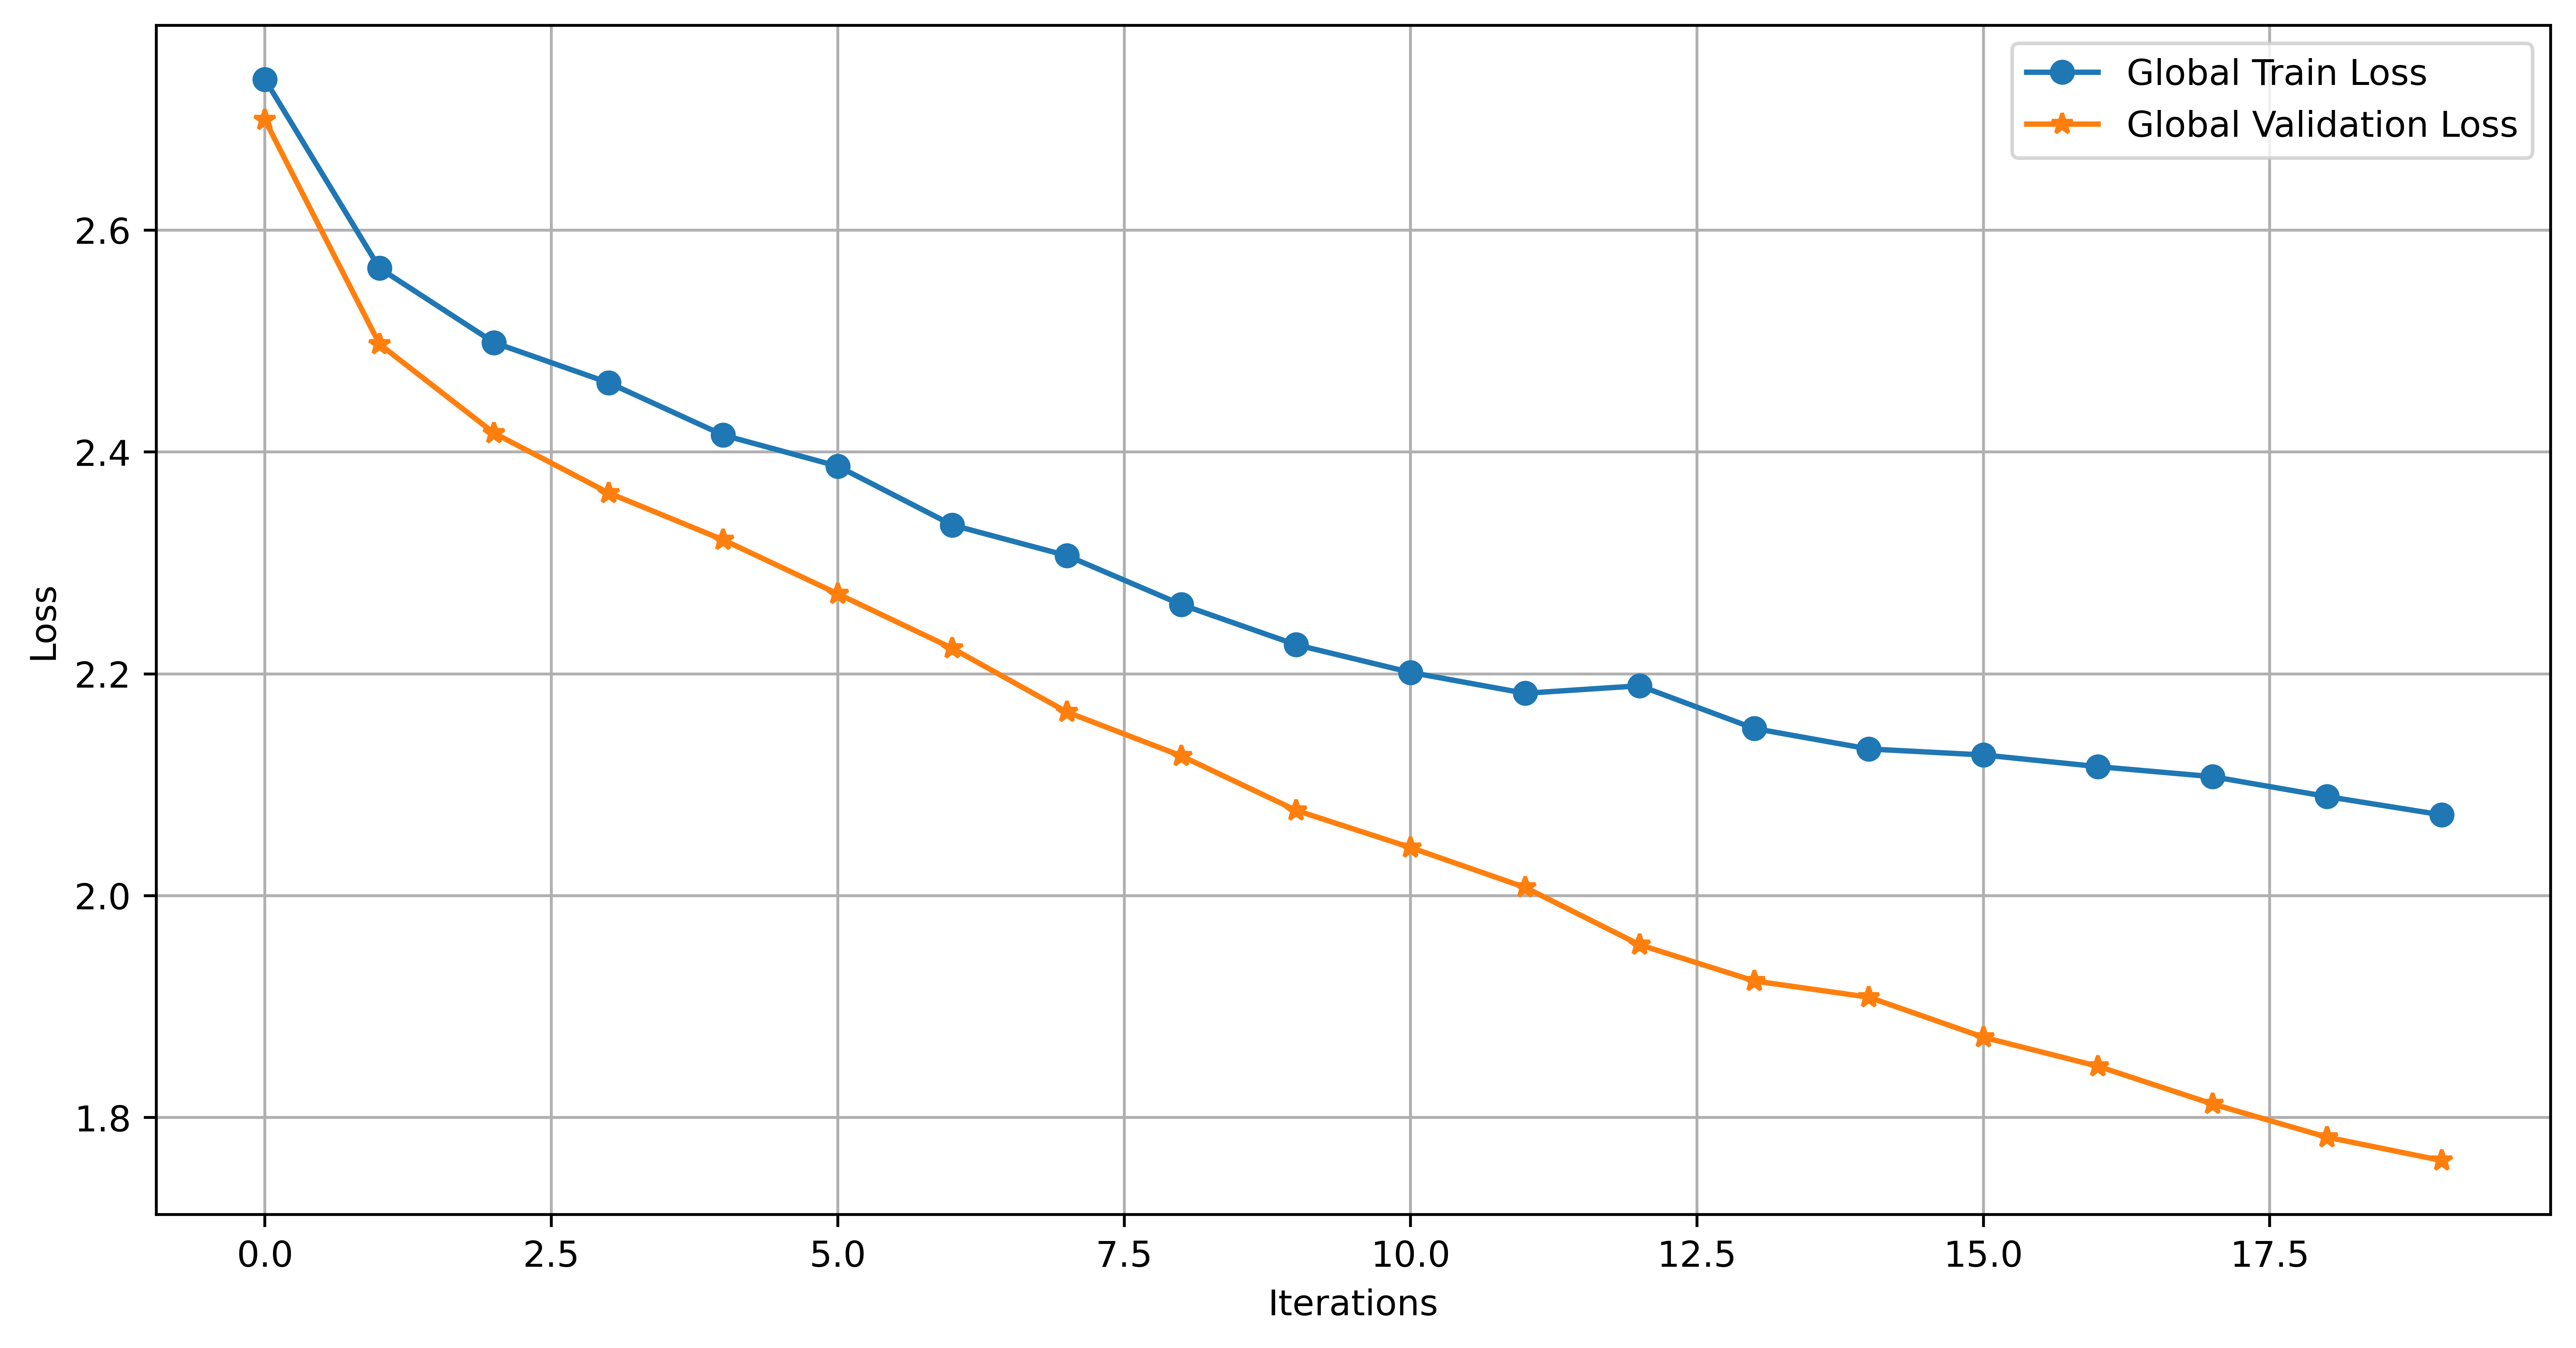

In [14]:
plt.figure(figsize=(12, 6),dpi=700)
plt.plot(global_losses_train, label='Global Train Loss',marker="o")
plt.plot(global_losses_val, label='Global Validation Loss',marker="*")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
for global_iter in range(n_global_iters):
    local_models = []
    for client_idx in range(n_clients):
        local_model = local_train(client_idx, global_model, n_local_iters)
        local_models.append(local_model.state_dict())

    # Average the updates from all clients
    global_state_dict = {}
    for key in local_models[0].keys():
        global_state_dict[key] = torch.mean(torch.stack([local_model[key].float() for local_model in local_models]), dim=0)

    global_model.load_state_dict(global_state_dict)

    # Estimate global train and validation losses
    global_losses = estimate_loss1(model=global_model)
    print(f"Global iter {global_iter}: Global train loss {global_losses['train']:.4f}, Global val loss {global_losses['val']:.4f}")

    # Record the CPU and memory usage
    cpu_percentages.append(psutil.cpu_percent())
    memory_percentages.append(psutil.virtual_memory().percent)


Client 0: Local train loss 4.6911, Local val loss 4.6929
Client 1: Local train loss 4.6847, Local val loss 4.6928
Client 2: Local train loss 4.6875, Local val loss 4.6902
Client 3: Local train loss 4.6929, Local val loss 4.6977
Client 4: Local train loss 4.6781, Local val loss 4.6805
Client 5: Local train loss 4.6887, Local val loss 4.6953
Client 6: Local train loss 4.6881, Local val loss 4.6949
Client 7: Local train loss 4.6927, Local val loss 4.6901
Client 8: Local train loss 4.6814, Local val loss 4.6829
Client 9: Local train loss 4.6910, Local val loss 4.6907
Global iter 0: Global train loss 4.6854, Global val loss 4.6874
Client 0: Local train loss 4.1545, Local val loss 4.1594
Client 1: Local train loss 4.1491, Local val loss 4.1528
Client 2: Local train loss 4.1544, Local val loss 4.1592
Client 3: Local train loss 4.1511, Local val loss 4.1508
Client 4: Local train loss 4.1516, Local val loss 4.1537
Client 5: Local train loss 4.1608, Local val loss 4.1589
Client 6: Local train lo

Client 0: Local train loss 2.7584, Local val loss 2.7163
Client 1: Local train loss 2.7834, Local val loss 2.7419
Client 2: Local train loss 2.7550, Local val loss 2.7195
Client 3: Local train loss 2.7508, Local val loss 2.7118
Client 4: Local train loss 2.7553, Local val loss 2.7100
Client 5: Local train loss 2.7383, Local val loss 2.7123
Client 6: Local train loss 2.7503, Local val loss 2.7120
Client 7: Local train loss 2.7475, Local val loss 2.7030
Client 8: Local train loss 2.7382, Local val loss 2.7149
Client 9: Local train loss 2.7551, Local val loss 2.7041
Global iter 13: Global train loss 2.7404, Global val loss 2.6893
Client 0: Local train loss 2.7327, Local val loss 2.7003
Client 1: Local train loss 2.7203, Local val loss 2.6902
Client 2: Local train loss 2.7268, Local val loss 2.6849
Client 3: Local train loss 2.7322, Local val loss 2.6923
Client 4: Local train loss 2.7219, Local val loss 2.6907
Client 5: Local train loss 2.7546, Local val loss 2.7145
Client 6: Local train l

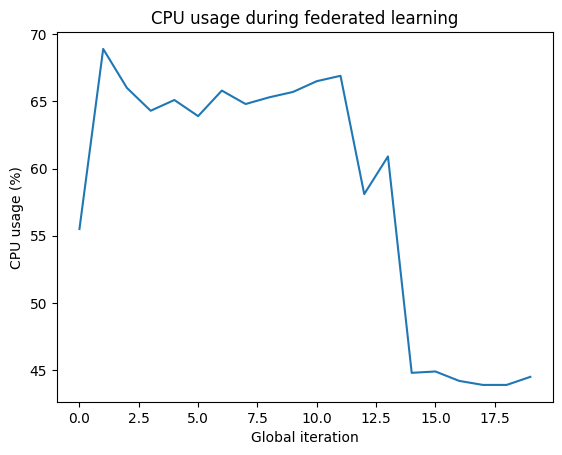

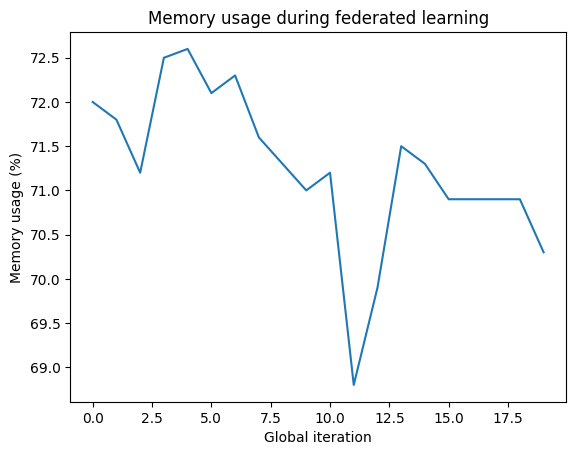

In [12]:
plt.figure()
plt.plot(cpu_percentages)
plt.xlabel("Global iteration")
plt.ylabel("CPU usage (%)")
plt.title("CPU usage during federated learning")
plt.show()

# Plot memory usage
plt.figure()
plt.plot(memory_percentages)
plt.xlabel("Global iteration")
plt.ylabel("Memory usage (%)")
plt.title("Memory usage during federated learning")
plt.show()

In [13]:
cpu_percentages

[54.0,
 59.4,
 61.5,
 64.2,
 66.6,
 61.4,
 60.9,
 62.7,
 62.6,
 62.0,
 61.9,
 61.5,
 62.2,
 61.7,
 59.4,
 59.7,
 60.1,
 61.0,
 59.6,
 59.0]

In [14]:
memory_percentages

[65.8,
 65.9,
 67.7,
 67.7,
 67.3,
 67.2,
 67.5,
 67.2,
 67.0,
 67.1,
 67.3,
 67.0,
 67.3,
 67.8,
 67.1,
 67.6,
 67.7,
 68.1,
 68.3,
 68.3]